# Import libraries

In [2]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Import dataset

In [44]:
# file name here 
file_name = 'games.csv'
# import the dataset
df = pd.read_csv(file_name)
# Select columns
cols = df.columns
df

,game_id,competition_id,competition_type,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,...,home_club_position,away_club_position,club_home_name,club_away_name,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url
0,2229332,DFL,other,2012,Final,2012-08-12,27,16,2,1,...,-1,-1,Fc Bayern Munchen,Borussia Dortmund,Jupp Heynckes,Jürgen Klopp,Allianz Arena,69000,Michael Weiner,https://www.transfermarkt.co.uk/spielbericht/i...
1,2244388,SUC,other,2012,final 1st leg,2012-08-22,131,418,3,2,...,-1,-1,Fc Barcelona,Real Madrid,Tito Vilanova,José Mourinho,Spotify Camp Nou,91728,Carlos Clos Gómez,https://www.transfermarkt.co.uk/spielbericht/i...
2,2269557,CDR,domestic_cup,2012,4th round 2nd leg,2012-11-28,3709,4032,0,0,...,-1,-1,Fc Getafe,NaN,Luis García,Claudio Barragán,Coliseum Alfonso Pérez,2000,Pedro Jesús Pérez Montero,https://www.transfermarkt.co.uk/spielbericht/i...
3,2254432,CDR,domestic_cup,2012,First Round Replay,2012-08-30,21322,7077,1,0,...,-1,-1,NaN,NaN,Pedro Buenaventura,Pato,El Palmar,0,Andrés Manuel Ceballos Silva,https://www.transfermarkt.co.uk/spielbericht/i...
4,2221759,DFB,domestic_cup,2012,First Round,2012-08-20,109,27,0,4,...,-1,-1,NaN,Fc Bayern Munchen,Oscar Corrochano,Jupp Heynckes,Jahnstadion,12500,Guido Winkmann,https://www.transfermarkt.co.uk/spielbericht/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59928,3901629,ECLQ,international_cup,2022,Qualifying Round 2nd leg,2022-08-25,540,6808,8,6,...,-1,-1,NaN,NaN,Vladimir Weiss,Sergej Jakirovic,NFS - Tehelné Pole,14333,Mohammed Al-Hakim,https://www.transfermarkt.co.uk/spielbericht/i...
59929,3901635,ECLQ,international_cup,2022,Qualifying Round 2nd leg,2022-08-25,2976,40812,5,4,...,-1,-1,NaN,NaN,Elyaniv Barda,Mirel Radoi,Toto Jacob Turner Stadium,14701,Erik Lambrechts,https://www.transfermarkt.co.uk/spielbericht/i...
59930,3901633,ECLQ,international_cup,2022,Qualifying Round 2nd leg,2022-08-25,62,9644,2,0,...,-1,-1,NaN,NaN,Jindrich Trpisovsky,Marek Papszun,Fortuna Arena,19370,Craig Pawson,https://www.transfermarkt.co.uk/spielbericht/i...
59931,3901625,ECLQ,international_cup,2022,Qualifying Round 2nd leg,2022-08-25,7769,790,1,0,...,-1,-1,NaN,NaN,Dan Petrescu,Damir Krznar,Dr. Constantin Rădulescu,9852,John Beaton,https://www.transfermarkt.co.uk/spielbericht/i...


In [61]:
# Dataframe Data types
df.dtypes

game_id               float64
season                float64
home_club_id          float64
away_club_id          float64
home_club_goals       float64
away_club_goals       float64
home_club_position    float64
away_club_position    float64
attendance            float64
dtype: object

# Remove Nominal Features

In [46]:
nominal = []
for col in cols:
    if df[col].dtype != 'int64':
        nominal.append(col)
df.drop(nominal, inplace=True, axis=1)
df

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
0,2229332,2012,27,16,2,1,-1,-1,69000
1,2244388,2012,131,418,3,2,-1,-1,91728
2,2269557,2012,3709,4032,0,0,-1,-1,2000
3,2254432,2012,21322,7077,1,0,-1,-1,0
4,2221759,2012,109,27,0,4,-1,-1,12500
...,...,...,...,...,...,...,...,...,...
59928,3901629,2022,540,6808,8,6,-1,-1,14333
59929,3901635,2022,2976,40812,5,4,-1,-1,14701
59930,3901633,2022,62,9644,2,0,-1,-1,19370
59931,3901625,2022,7769,790,1,0,-1,-1,9852


## Check missing values

In [47]:
df.isnull().sum()

game_id               0
season                0
home_club_id          0
away_club_id          0
home_club_goals       0
away_club_goals       0
home_club_position    0
away_club_position    0
attendance            0
dtype: int64

## Remove duplicate rows

In [48]:
df.drop_duplicates(inplace=True)
df = df.reset_index()
df = df.drop('index', axis=1)
df

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
0,2229332,2012,27,16,2,1,-1,-1,69000
1,2244388,2012,131,418,3,2,-1,-1,91728
2,2269557,2012,3709,4032,0,0,-1,-1,2000
3,2254432,2012,21322,7077,1,0,-1,-1,0
4,2221759,2012,109,27,0,4,-1,-1,12500
...,...,...,...,...,...,...,...,...,...
59928,3901629,2022,540,6808,8,6,-1,-1,14333
59929,3901635,2022,2976,40812,5,4,-1,-1,14701
59930,3901633,2022,62,9644,2,0,-1,-1,19370
59931,3901625,2022,7769,790,1,0,-1,-1,9852


## Dataset describe

In [49]:
df.describe()

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
count,5.993300e+04,59933.000000,59933.000000,59933.000000,59933.000000,59933.000000,59933.000000,59933.000000,59933.000000
mean,2.930265e+06,2016.735354,4675.824854,4251.063304,1.586171,1.310463,6.216976,6.344435,15197.377772
std,4.934403e+05,3.091961,10705.407526,9656.185138,1.421041,1.349049,6.462102,6.536500,17431.842810
min,2.211607e+06,2011.000000,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2.492488e+06,2014.000000,354.000000,347.000000,1.000000,0.000000,-1.000000,-1.000000,1800.000000
50%,2.883613e+06,2017.000000,995.000000,987.000000,1.000000,1.000000,5.000000,6.000000,8902.000000
75%,3.335163e+06,2019.000000,3060.000000,3008.000000,2.000000,2.000000,12.000000,12.000000,22488.000000
max,3.998929e+06,2022.000000,102251.000000,102261.000000,15.000000,16.000000,21.000000,21.000000,99354.000000


## Histogram of features before normalization

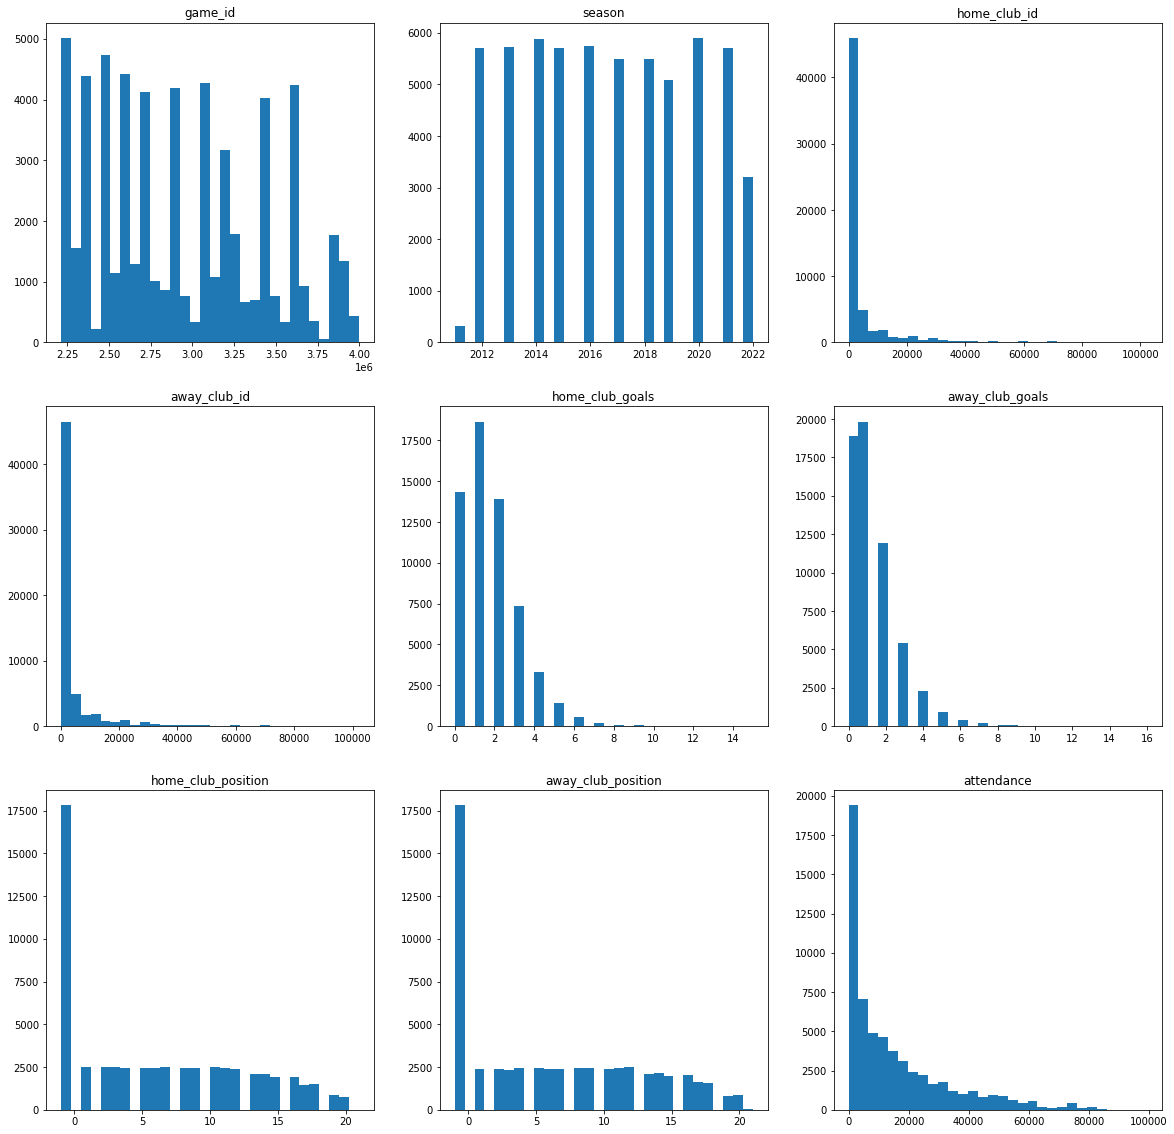

In [50]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
cols = df.columns
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

## Scaling and normalization

### Apply Z-score scaler

In [51]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(df)

In [52]:
pd.DataFrame(scaled, columns=cols).describe()

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
count,5.993300e+04,5.993300e+04,59933.000000,5.993300e+04,5.993300e+04,5.993300e+04,5.993300e+04,5.993300e+04,5.993300e+04
mean,-2.124527e-16,2.207990e-14,0.000000,-4.173177e-17,-4.742247e-17,5.595852e-17,-1.896899e-17,-4.362867e-17,-1.327829e-17
std,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.456436e+00,-1.854940e+00,-0.436682,-4.400391e-01,-1.116213e+00,-9.714061e-01,-1.116825e+00,-1.123613e+00,-8.718243e-01
25%,-8.872013e-01,-8.846738e-01,-0.403708,-4.043104e-01,-4.124975e-01,-9.714061e-01,-1.116825e+00,-1.123613e+00,-7.685642e-01
50%,-9.454557e-02,8.559218e-02,-0.343831,-3.380311e-01,-4.124975e-01,-2.301369e-01,-1.883266e-01,-5.269448e-02,-3.611454e-01
75%,8.205678e-01,7.324362e-01,-0.150937,-1.287334e-01,2.912176e-01,5.111323e-01,8.949212e-01,8.652356e-01,4.182394e-01
max,2.165759e+00,1.702702e+00,9.114645,1.015005e+01,9.439514e+00,1.088890e+01,2.287668e+00,2.242131e+00,4.827793e+00


### Apply min-max normalizer

In [53]:
scaler = preprocessing.MinMaxScaler()
normalized = scaler.fit_transform(scaled)
df = pd.DataFrame(normalized, columns=[cols])
df

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
0,0.009917,0.090909,0.000254,0.000137,0.133333,0.0625,0.0,0.0,0.694486
1,0.018341,0.090909,0.001271,0.004068,0.200000,0.1250,0.0,0.0,0.923244
2,0.032423,0.090909,0.036264,0.039410,0.000000,0.0000,0.0,0.0,0.020130
3,0.023960,0.090909,0.208518,0.069187,0.066667,0.0000,0.0,0.0,0.000000
4,0.005680,0.090909,0.001056,0.000244,0.000000,0.2500,0.0,0.0,0.125813
...,...,...,...,...,...,...,...,...,...
59928,0.945561,1.000000,0.005271,0.066556,0.533333,0.3750,0.0,0.0,0.144262
59929,0.945564,1.000000,0.029095,0.399085,0.333333,0.2500,0.0,0.0,0.147966
59930,0.945563,1.000000,0.000597,0.094290,0.133333,0.0000,0.0,0.0,0.194959
59931,0.945559,1.000000,0.075971,0.007706,0.066667,0.0000,0.0,0.0,0.099161


## Outlier Detection

### Boxplot method

c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

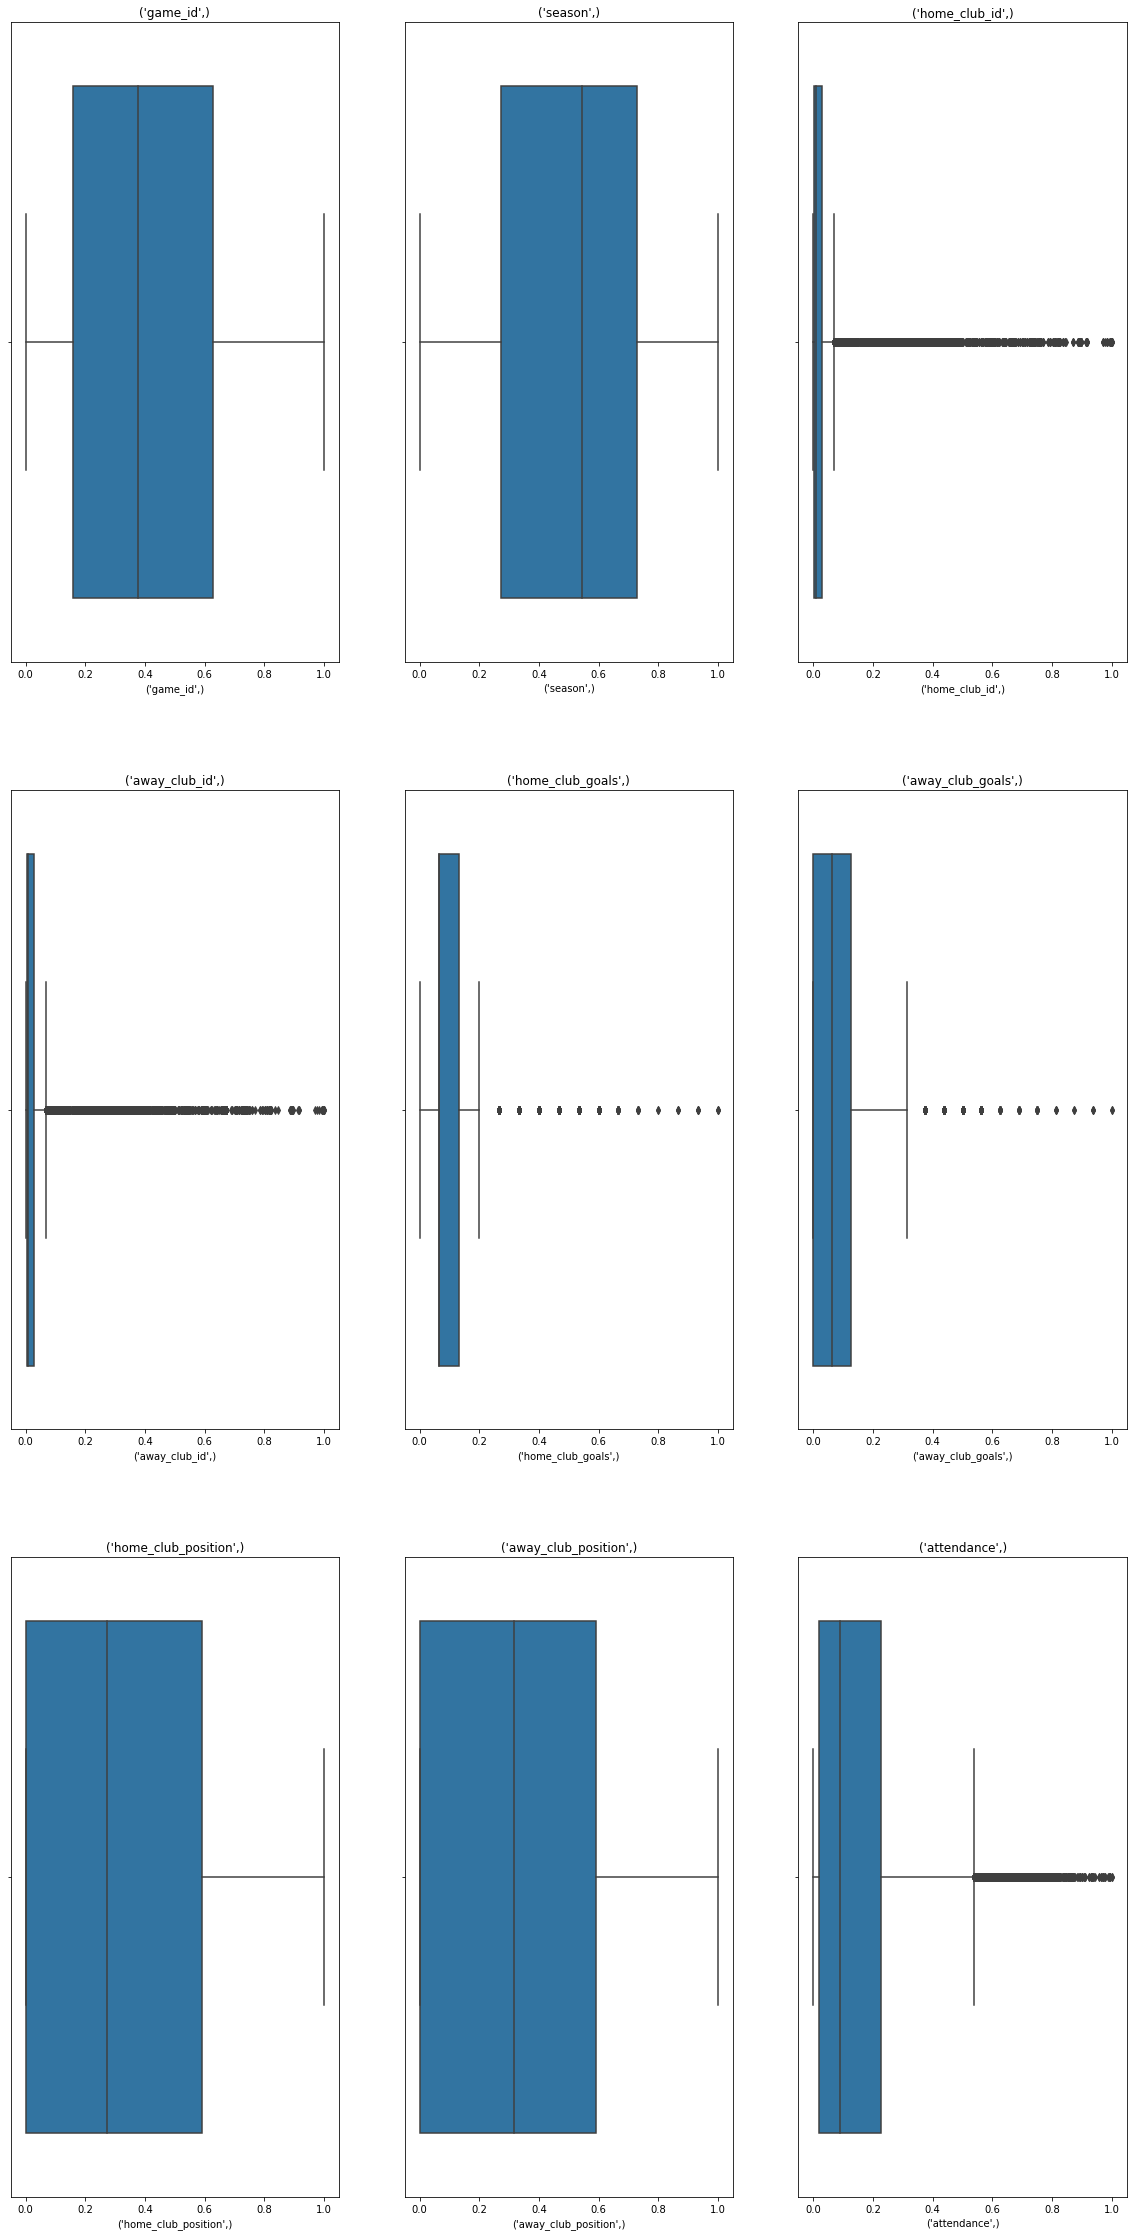

In [56]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 40))
i = 0
j = 0
cols = df.columns
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    sns.boxplot(df[col], ax=ax[i,j])
    j += 1

### Implementing IQR for removing outliers

In [57]:
for col in cols:
    if col != 'output':
        # IQR
        Q1 = np.percentile(df[col], 25,
                        interpolation = 'midpoint')

        Q3 = np.percentile(df[col], 75,
                        interpolation = 'midpoint')
        IQR = Q3 - Q1

        # Upper bound
        upper = np.where(df[col] >= (Q3+1.5*IQR))
        # Lower bound
        lower = np.where(df[col] <= (Q1-1.5*IQR))
        #Removing the Outliers
        df.drop(upper[0], inplace = True)
        df.drop(lower[0], inplace = True)
        df.reset_index(inplace = True, drop = True)
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13204\770464985.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[col], 25,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13204\770464985.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[col], 75,


,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
0,0.032423,0.090909,0.036264,0.039410,0.000000,0.0000,0.000000,0.000000,0.020130
1,0.005680,0.090909,0.001056,0.000244,0.000000,0.2500,0.000000,0.000000,0.125813
2,0.021745,0.090909,0.001946,0.012732,0.200000,0.0000,0.272727,0.590909,0.172363
3,0.021745,0.090909,0.004557,0.002279,0.066667,0.1250,0.727273,0.681818,0.116754
4,0.004581,0.000000,0.000557,0.004850,0.200000,0.1250,0.000000,0.000000,0.145792
...,...,...,...,...,...,...,...,...,...
39294,0.945553,1.000000,0.010200,0.027205,0.200000,0.0000,0.000000,0.000000,0.192463
39295,0.945568,1.000000,0.002650,0.054196,0.000000,0.0625,0.000000,0.000000,0.159017
39296,0.945567,1.000000,0.000557,0.004401,0.200000,0.1250,0.000000,0.000000,0.144866
39297,0.945569,1.000000,0.010386,0.003687,0.000000,0.1875,0.000000,0.000000,0.084898


## Histogram after normalization

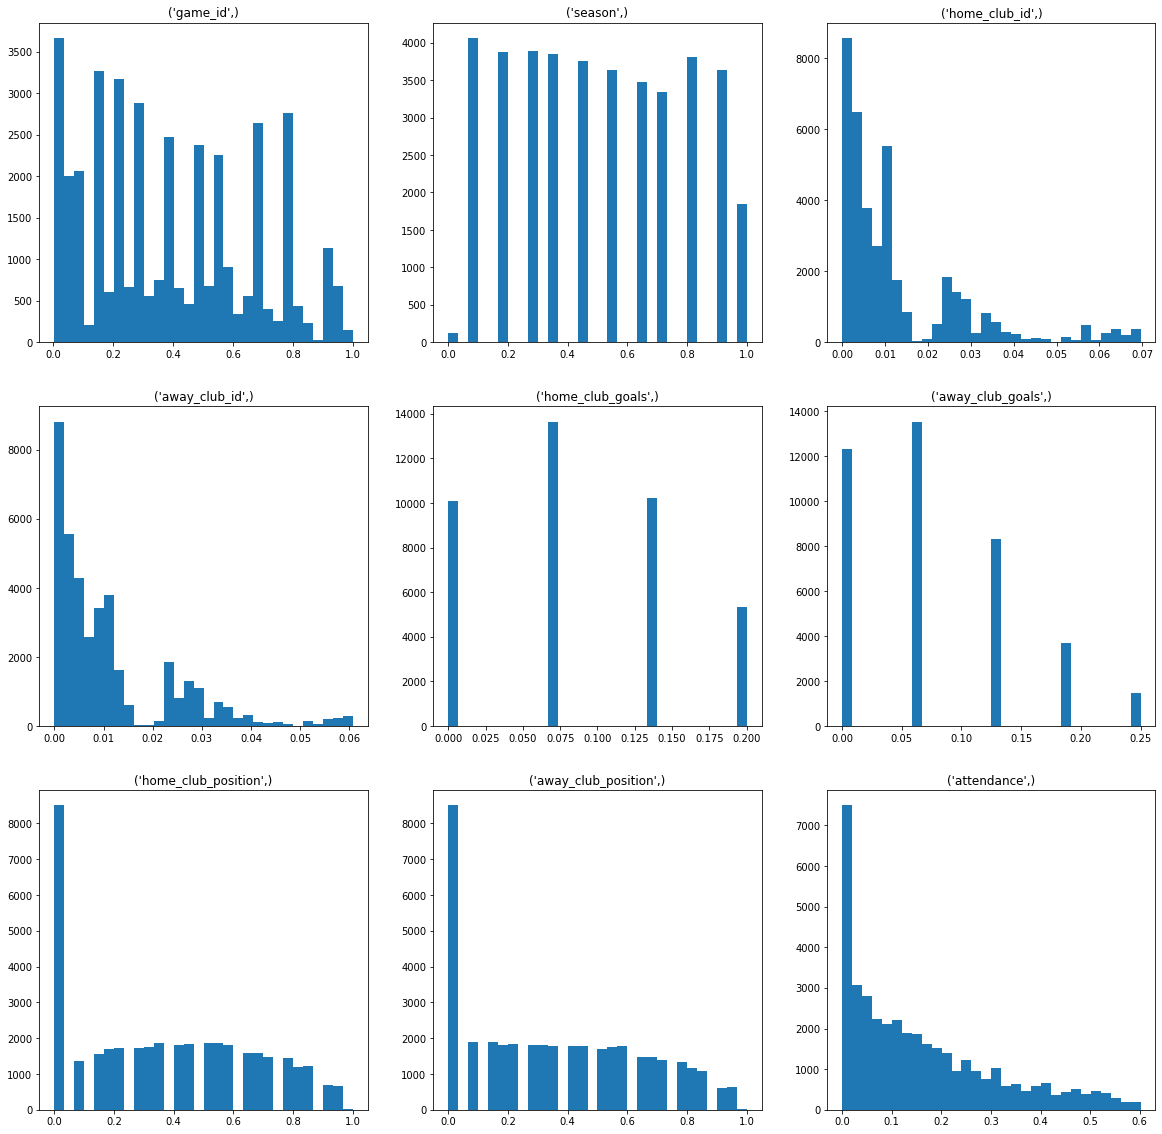

In [59]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

## Heatmap

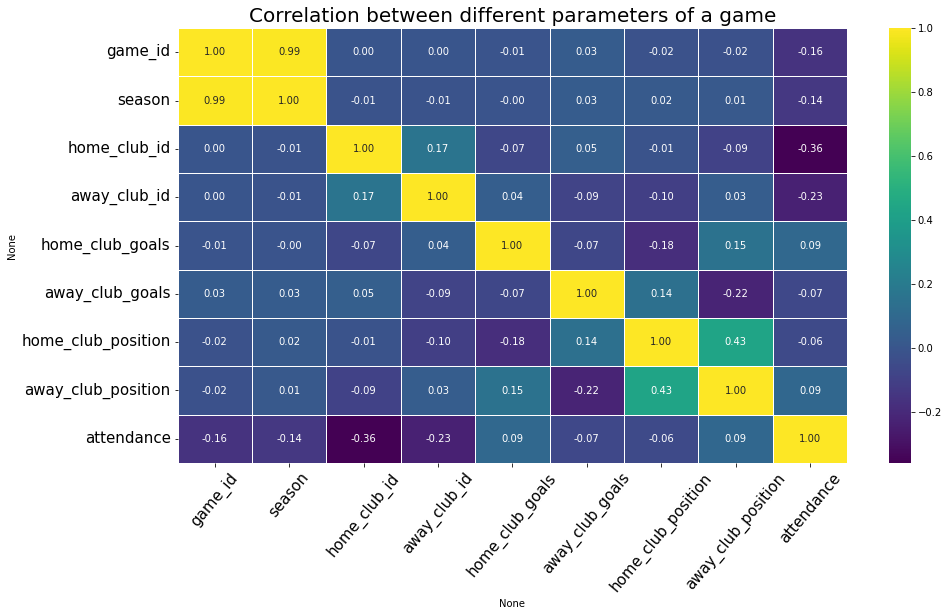

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlation between different parameters of a game', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()